# Nutrisense

In [1]:
import pandas as pd

# Load dataset
file_path = 'recipe_final.csv'
recipe_df = pd.read_csv(file_path)

recipe_df.head()

Unnamed: 0  recipe_id                        recipe_name  aver_rate  \
0           0     222388                     Homemade Bacon       5.00   
1           1     240488  Pork Loin, Apples, and Sauerkraut       4.76   
2           2     218939   Foolproof Rosemary Chicken Wings       4.57   
3           3      87211              Chicken Pesto Paninis       4.62   
4           4     245714                 Potato Bacon Pizza       4.50   

                                           image_url  review_nums  calories  \
0  https://images.media-allrecipes.com/userphotos...            3        15   
1  https://images.media-allrecipes.com/userphotos...           29        19   
2  https://images.media-allrecipes.com/userphotos...           12        17   
3  https://images.media-allrecipes.com/userphotos...          163        32   
4  https://images.media-allrecipes.com/userphotos...            2         8   

   fat  carbohydrates  protein  cholesterol  sodium  fiber  \
0   36              1       42           21      81      2   
1   18             10       73           33     104     41   
2   36              2       48           24      31      4   
3   45             20       65           20      43     18   
4   12              5       14            7       8      3   

                                    ingredients_list  
0  ['pork belly', 'smoked paprika', 'kosher salt'...  
1  ['sauerkraut drained', 'Granny Smith apples sl...  
2  ['chicken wings', 'sprigs rosemary', 'head gar...  
3  ['focaccia bread quartered', 'prepared basil p...  
4  ['red potatoes', 'strips bacon', 'Sauce:', 'he...

In [2]:
len(recipe_df)

48735

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [4]:
# Preprocess bahan
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['ingredients_list'])

In [5]:
# Normalisasi data numerik
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['protein', 'carbohydrates', 'fat', 'fiber']])

In [6]:
# gabungkan fitur
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])

# Train KNN Model testing untuk mencari titik elbow
knn = NearestNeighbors(n_neighbors=20, metric='euclidean')
knn.fit(X_combined)

NearestNeighbors(metric='euclidean', n_neighbors=20)

In [ ]:
#testing mencari titik elbow sampai n = 20
import plt as mat
distances, _ = knn.kneighbors(X_combined)
avg_distances = np.mean(distances, axis=0)

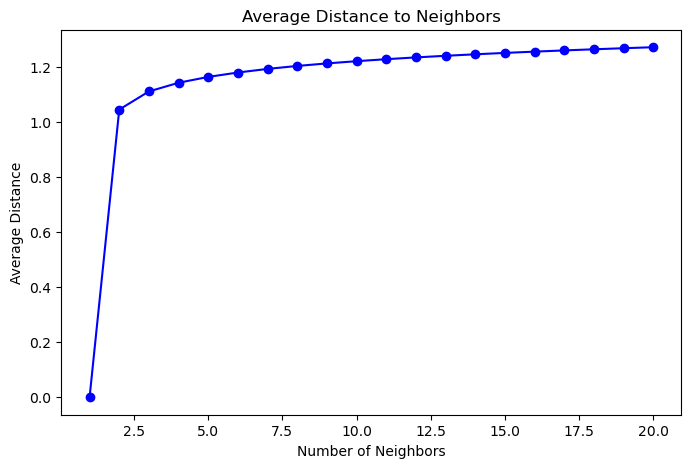

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(avg_distances) + 1), avg_distances, marker='o', color='b')
plt.title("Average Distance to Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Average Distance")
plt.show()

Didapatkan titik elbow pada n = 3

In [10]:
# Train KNN Model dgn n = 3
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X_combined)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [ ]:
# Function to Recommend Recipes
def recommend_recipes(umur, gender, list_bahan):
    #gizi sesuai PERATURAN MENTERI KESEHATAN REPUBLIK INDONESIA
    #               protein, karbo, fat,  fiber
    data_nutrisi = [[13.3,   83.3,  18.3, 7.8], #kategori 0
                    [16.7,   100,   21.7, 9.3], #kategori 1
                    [18.3,   93.3,  21.7, 9  ]] #kategori 2
    
    #mengategorikan berdasarkan umur dan gender
    #dikhusus untuk anak sd range 7-12
    if umur < 7:
        print("maaf umur tidak termasuk anak sd")
    elif umur < 10:
        kategori = 0
    elif umur < 13:
        if gender == 1: #1 untuk laki laki dan 0 untuk perempuan
            kategori = 1
        else:
            kategori = 2
    else:
        print("maaf umur tidak termasuk anak sd") 
    
    #mengisi input feature berdasarkan kategori
    input_features = []
    for i in range(0,4):
        input_features.append(data_nutrisi[kategori][i])
    input_features.append(list_bahan)
    
    # merekomendasikan resep
    input_features_scaled = scaler.transform([input_features[:4]])
    input_ingredients_transformed = vectorizer.transform([input_features[4]])
    input_combined = np.hstack([input_features_scaled, input_ingredients_transformed.toarray()])
    distances, indices = knn.kneighbors(input_combined)
    recommendations = recipe_df.iloc[indices[0]]

    # menyimpan data nutrisi satu persatu untuk dibandingkan
    nutrisi_resep = []
    selector = ['protein', 'carbohydrates', 'fat', 'fiber']
    for i in range(0,4):
        nutrisi_resep.append(recipe_df.iloc[indices[0][0]][selector[i]])

    # membandingkan nutrisi resep dengan acuan
    gizi_terpenuhi = []
    for i in range(0,4):
        gizi_terpenuhi.append(nutrisi_resep[i] >= data_nutrisi[kategori][i])

    #print gizi yang terpenuhi
    for i in range(0, 4):
        print(f'{selector[i]} : {gizi_terpenuhi[i]}')
    
    
    print(recommendations)

    #return rekomendasi
    return recommendations[['recipe_name', 'ingredients_list', 'image_url']]

# Example Input
input_features = [10, 1,'chicken']
recommendations = recommend_recipes(10, 1,'chicken')
recommendations

c:\Users\ergik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


protein : True
carbohydrates : True
fat : False
fiber : False
       Unnamed: 0  recipe_id                 recipe_name  aver_rate  \
11552       11552     247451  Pulled BBQ Chicken Sliders       4.17   
19591       19591     245720            Churro Log Cabin       5.00   
24585       24585     245028  Poached Pears Belle Helene       5.00   

                                               image_url  review_nums  \
11552  https://images.media-allrecipes.com/userphotos...            5   
19591  http://images.media-allrecipes.com/userphotos/...            1   
24585  http://images.media-allrecipes.com/userphotos/...            7   

       calories  fat  carbohydrates  protein  cholesterol  sodium  fiber  \
11552        20   20            110       32           12      30      4   
19591        77   70             91       10            2      15      9   
24585        53   21             78        8            5      10     35   

                                        ingredients_lis

recipe_name  \
11552  Pulled BBQ Chicken Sliders   
19591            Churro Log Cabin   
24585  Poached Pears Belle Helene   

                                        ingredients_list  \
11552  ['skinless boneless chicken breast halves', 'o...   
19591  ['canned white frosting', "pre-made churros (s...   
24585  ['water', 'lemon zested and juiced', 'Bosc pea...   

                                               image_url  
11552  https://images.media-allrecipes.com/userphotos...  
19591  http://images.media-allrecipes.com/userphotos/...  
24585  http://images.media-allrecipes.com/userphotos/...